In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.animation import ImageMagickWriter
import copy

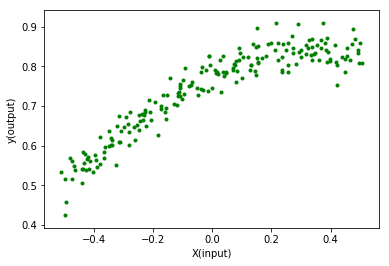

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
np.random.seed(127)
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

# y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
y = np.cos(x)+0.8*x -0.5 
noise = np.random.normal(0,0.03, x.shape)
y = y + noise
xmean=x.mean() ### for later use
x = x - x.mean()#0.5
# xzz = x*2

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.xlabel("X(input)")
plt.ylabel("y(output)")
plt.savefig("data_set.svg")

### Various Polynomial Functions

In [3]:
x_ = np.linspace(-1, 1, num=500)

### O th order

In [4]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

a0 = np.linspace(-0.9,0.7, num=20)
a0 = np.append(a0, a0[::-1])

writer = ImageMagickWriter(fps=10)
with writer.saving(fig, "poly_0th_order.gif", 100):
    for a0_ in a0:
        y_ = a0_*(x_**0)
        ax.clear()
        plt.xlim((-1, 1))
        plt.ylim((-1, 1))
        plt.xlabel("x(input)")
        plt.ylabel("y(output)")
        plt.plot(x_, y_, color='r', label='function', lw=3)
        plt.text(-0.43,1.1,f'a0 = {a0_:.2f}')

        plt.axhline(0,color='k') # x = 0
        plt.axvline(0,color='k')
        plt.grid()
        plt.legend()

        fig.canvas.draw()
        plt.pause(0.01)
        
        writer.grab_frame()

TclError: can't invoke "wm" command: application has been destroyed

### 1st order

In [38]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

a00 = np.linspace(-1,0.1, num=20)
a01 = np.linspace(0.1,0.1, num=20)
a0 = np.append(a00,a01)

a10 = np.linspace(-1, -1, num=20)
a11 = np.linspace(-1, 1.5, num=20)
a1 = np.append(a10, a11)

a0 = np.append(a0, a0[::-1])
a1 = np.append(a1, a1[::-1])


writer = ImageMagickWriter(fps=10)
with writer.saving(fig, "poly_1st_order.gif", 100):
    for a0_, a1_ in zip(a0, a1):
        y_ = a0_*(x_**0) + a1_*(x_**1)
        ax.clear()
        plt.xlim((-1, 1))
        plt.ylim((-1, 1))
        plt.xlabel("x(input)")
        plt.ylabel("y(output)")
        plt.plot(x_, y_, color='r', label='function', lw=3)
        plt.text(-0.43,1.1,f'a0 = {a0_:.2f}, a1 = {a1_:.2f}')

        plt.axhline(0,color='k') # x = 0
        plt.axvline(0,color='k')
        plt.grid()
        plt.legend()

        fig.canvas.draw()
        plt.pause(0.01)
        
        writer.grab_frame()

### 2nd order

In [49]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

a00 = np.linspace(0,0, num=20)
a01 = np.linspace(0,-1, num=20)
a02 = np.linspace(-1,0, num=20)

a0 = np.append(a00,[a01, a02])

a10 = np.linspace(0, 0, num=20)
a11 = np.linspace(0, -1, num=20)
a12 = np.linspace(-1, 0, num=20)

a1 = np.append(a10, [a11, a12])

a20 = np.linspace(0, -1, num=20)
a21 = np.linspace(-1, 1, num=20)
a22 = np.linspace(1, 1, num=20)

a2 = np.append(a20, [a21, a22])

a0 = np.append(a0, a0[::-1])
a1 = np.append(a1, a1[::-1])
a2 = np.append(a2, a2[::-1])

writer = ImageMagickWriter(fps=10)
with writer.saving(fig, "poly_2nd_order.gif", 100):
    for a0_, a1_, a2_ in zip(a0, a1, a2):
        y_ = a0_*(x_**0) + a1_*(x_**1) + a2_*(x_**2)
        ax.clear()
        plt.xlim((-1, 1))
        plt.ylim((-1, 1))
        plt.xlabel("x(input)")
        plt.ylabel("y(output)")
        plt.plot(x_, y_, color='r', label='function', lw=3)
        plt.text(-0.43,1.1,f'a0 = {a0_:.2f}, a1 = {a1_:.2f}, a2 = {a2_:.2f}')

        plt.axhline(0,color='k') # x = 0
        plt.axvline(0,color='k')
        plt.grid()
        plt.legend()

        fig.canvas.draw()
        plt.pause(0.01)
        
        writer.grab_frame()        

### nth order polynomial

In [50]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

x_ = np.linspace(-4, 4, num=500)

# a = np.array([-0.8,0.9,-0.5,0.2,0.8,-0.6,0.5])
# a = np.array([-1.7, 2, -1, 0.3, -0.5, 0.9, -1.2, 1.2, -0.7, ])
a = np.array([1, -2.1, 3.9, -2.9, -4, 2, -0.9, 3, 2.5, -1.5 ])
# b = np.array([])
y_ = 1
writer = ImageMagickWriter(fps=1)
with writer.saving(fig, "poly_nth_order.gif", 100):
    for i in range(len(a)):
        y_ *= (x_-a[i])
        y__ = y_/(y_.max()-y_.min())
    #     y_ = 0
    #     y_ = (x_**5)

        ax.clear()
        plt.xlim((x_.min(), x_.max()))
        plt.ylim((-1, 1))
    #     plt.ylim((-4, 6))

        plt.xlabel("x(input)")
        plt.ylabel("y(output)")
        plt.plot(x_, y__, color='r', label='function', lw=3)
        plt.scatter(a[:i+1],np.zeros_like(a[:i+1]), marker='o', color='purple', label='roots')
        plt.text(-0.43,1.1,f'order(n) = {i+1}')

        plt.axhline(0,color='k') # x = 0
        plt.axvline(0,color='k')
        plt.grid()
        plt.legend()

        fig.canvas.draw()
        plt.pause(1)

        writer.grab_frame()            

### utility function

In [4]:
def get_input_for_polynomial(x, order):
    X = []
    x_ = x.reshape(-1,1)
    for i in range(order+1):
        X.append(x_**i)
    return np.hstack(X)

## First order Regression(Linear)

In [5]:
# X = np.c_[x, np.ones(len(x))]
X = get_input_for_polynomial(x, order=1)
X.shape

(200, 2)

In [6]:
Y = y.reshape(-1,1) 
W = np.linalg.pinv(X) @ Y
np.round(W, decimals=4)

array([[0.7393],
       [0.3376]])

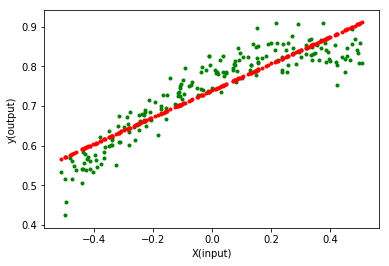

In [7]:
y_hat = X @ W
plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat, marker='.', color='r', label='prediction')

## Second order polynomial regression(Quadratic)

In [99]:
# X = np.c_[x**2, x, np.ones(len(x))]
X = get_input_for_polynomial(x, order=2)
Y = y.reshape(-1,1) 

X.shape, Y.shape

((200, 3), (200, 1))

In [100]:
W = np.linalg.pinv(X) @ Y
np.round(W, decimals=4)

array([[ 0.7784],
       [ 0.3381],
       [-0.4601]])

In [101]:
W

array([[ 0.77844202],
       [ 0.33814713],
       [-0.46011941]])

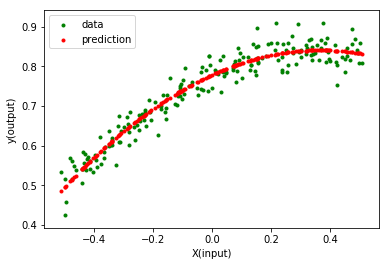

In [10]:
y_hat = X @ W
plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
plt.legend()

plt.savefig("poly_2_fit.svg")

In [11]:
Err = ((y_hat - Y)**2).mean()
np.round(Err, 6), Err

(0.000807, 0.000807006586622848)

## 199th order polynomial

(51, 1)


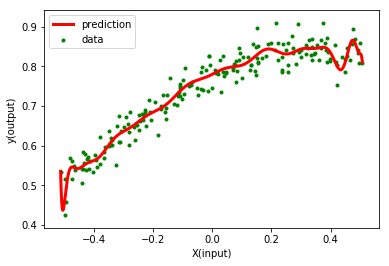

In [12]:
order=50
X = get_input_for_polynomial(x, order=order)
Y = y.reshape(-1,1)
W = np.linalg.pinv(X) @ Y
print(W.shape)

y_hat = X @ W
plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

# plt.scatter(x, y_hat, marker='.', color='r', label='prediction')

Tx = np.linspace(x.min(), x.max(), num=10000)
TX = get_input_for_polynomial(Tx, order=order)
Ty_hat = TX @ W
plt.plot(Tx, Ty_hat, lw=3, color='r', label='prediction')
plt.legend()    

plt.savefig("poly_199_fit.svg")

### Same can be done using SKLEARN

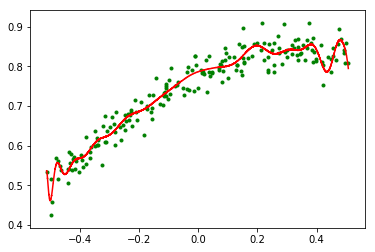

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x_ = x[:, np.newaxis]#[:50]
y_ = y[:, np.newaxis]#[:50]

polynomial_features= PolynomialFeatures(degree=50)
x_poly = polynomial_features.fit_transform(x_)

model = LinearRegression()
model.fit(x_poly, y_)

y_poly_pred = model.predict(x_poly)

x__ = np.linspace(x_.min(), x_.max(), num=10000).reshape(-1,1)
y__poly_pred = model.predict(polynomial_features.fit_transform(x__))

plt.scatter(x_, y_, marker='.', color='g', label='data')
# plt.scatter(x_, y_poly_pred, color='r', label='data')
plt.plot(x__, y__poly_pred, color='r', label='data')

### Higher order polynomial regression

In [18]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

Y = y.reshape(-1,1)
Tx = np.linspace(x.min(), x.max(), num=1000)

o1 = np.arange(2, 8)
o2 = np.arange(10, 30, 4)
o3 = np.arange(30, 110, 20)
o4 = np.array([120, 150, 199])
orders = np.concatenate([o1,o2,o3,o4])

errs = []
writer = ImageMagickWriter(fps=1)
with writer.saving(fig, "polys_all_fit.gif", 100):
    for order in orders:
        X = get_input_for_polynomial(x, order=order)
        W = np.linalg.pinv(X) @ Y
        y_hat = X @ W

        Err = ((y_hat - Y)**2).mean()
        errs.append(Err)
        Err_ = np.round(Err, decimals=10)

        TX = get_input_for_polynomial(Tx, order=order)
        Ty_hat = TX @ W

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='data')
        plt.plot(Tx, Ty_hat, lw=3, color='r', label='prediction')
        plt.text(-0.43,0.95,f'order = {order}, MSE = {Err}')

        plt.xlabel("X(input)")
        plt.ylabel("y(output)")
        plt.legend()    
        
        fig.canvas.draw()
        plt.pause(0.7)
        writer.grab_frame()            

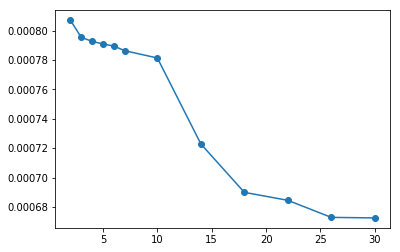

In [19]:
%matplotlib inline
plt.plot(orders[:12], errs[:12], marker='o')
plt.savefig("polys_errors.svg")

## plotting various powers of x

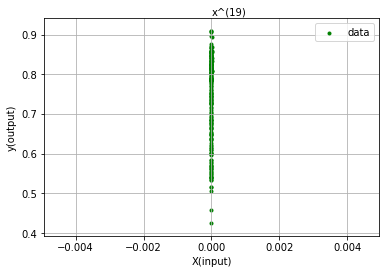

In [108]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()

Y = y.reshape(-1,1)
orders = np.arange(0, 20)

errs = []
writer = ImageMagickWriter(fps=1)
with writer.saving(fig, "data_viz_powers.gif", 100):
    for order in orders:
        x_n = x**order

        ax.clear()
        plt.scatter(x_n, y, marker='.', color='g', label='data')
        xlim = plt.xlim()
        plt.text(np.mean(xlim),0.95,f'x^({order})')

        plt.xlabel("X(input)")
        plt.ylabel("y(output)")
        plt.legend()    
        plt.grid()
        
        fig.canvas.draw()
        plt.pause(0.7)
        writer.grab_frame()            

In [20]:
x_n = x**199
x_n

array([-1.12263904e-058, -5.34768900e-061, -3.48600581e-061,
       -1.31614102e-061, -2.15295914e-064, -3.35157402e-065,
       -1.78323739e-065, -1.15392941e-066, -1.47112295e-067,
       -1.48236927e-071, -9.85124221e-072, -2.20963101e-072,
       -1.25961221e-072, -2.25544526e-073, -1.60595940e-073,
       -9.77344185e-075, -2.51714017e-075, -5.93379288e-076,
       -6.21475434e-077, -2.46861190e-077, -1.32547266e-079,
       -1.23011318e-080, -1.32265965e-081, -3.19534678e-082,
       -9.04502751e-085, -5.11720992e-085, -4.18925742e-088,
       -4.00119259e-088, -1.30488643e-088, -9.38962650e-092,
       -8.19464157e-092, -2.75882408e-093, -5.55195025e-094,
       -1.34131660e-094, -1.03984891e-094, -5.14545476e-098,
       -2.27449181e-099, -1.92412184e-100, -1.46565521e-100,
       -9.40911120e-102, -7.46984777e-103, -2.07010652e-105,
       -5.82287169e-108, -3.89580279e-109, -3.99525476e-110,
       -1.38796100e-110, -2.05558493e-111, -2.85748331e-116,
       -1.12054323e-116,

### With smaller dataset

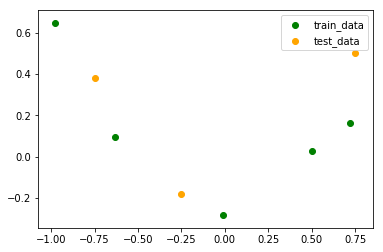

In [16]:
np.random.seed(330)
x2 = np.random.uniform(-1, 1, 5)
y2 = x2**2+ 0.1*x2 - 0.3
# noise = np.random.normal(scale=0.05, size=x2.shape)
# x2 = x2+noise
noise = np.random.normal(scale=0.1, size=x2.shape)
y2 = y2+noise

xtest = np.array([-0.75, -0.25, 0.75])
ytest = np.array([0.38, -0.18, 0.5])

plt.scatter(x2, y2, color='g', marker='o', label='train_data')
plt.scatter(xtest, ytest, color='orange', marker='o', label='test_data')
plt.legend()

ylim=plt.ylim()

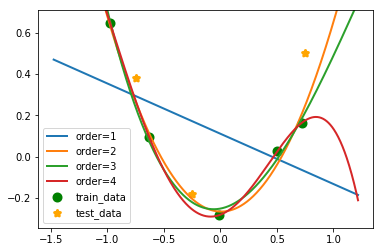

In [18]:
Tx = np.linspace(x2.min()-0.5, x2.max()+0.5, num=1000)
Y2 = y2.reshape(-1,1)
outs = []
errs = []

plt.scatter(x2, y2, color='g', marker='o', label='train_data', lw=4)
for order in range(1,5):
    X = get_input_for_polynomial(x2, order=order)
    W = np.linalg.pinv(X) @ Y2
    y_hat = X @ W

    Err = ((y_hat - Y2)**2).mean()
    
    outs.append(y_hat)
    errs.append(Err)

    TX = get_input_for_polynomial(Tx, order=order)
    Ty_hat = TX @ W
    
    plt.plot(Tx, Ty_hat, lw=2, label=f'order={order}')
    
plt.scatter(xtest, ytest, color='orange', marker='*', label='test_data', lw=3)
plt.legend()
plt.ylim(ylim)
plt.savefig("poly_5_pts.svg")

## Test Dataset

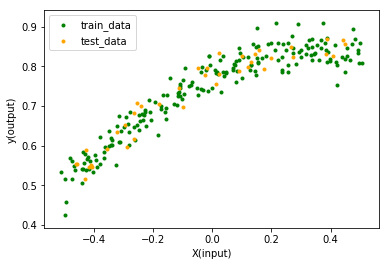

In [32]:
np.random.seed(127)
x_test = np.random.uniform(size=40)
noise = np.random.normal(0,0.02, x_test.shape)
x_test = x_test + noise
x_test = np.sort(x_test)

y_test = np.cos(x_test)+0.8*x_test -0.5 
noise = np.random.normal(0,0.03, x_test.shape)
y_test = y_test + noise
x_test = x_test - xmean

%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='train_data')
plt.scatter(x_test, y_test, marker='.', color='orange', label='test_data')

plt.xlabel("X(input)")
plt.ylabel("y(output)")
plt.legend()
plt.savefig("train_test_data_set.svg")

#### Saving the errors

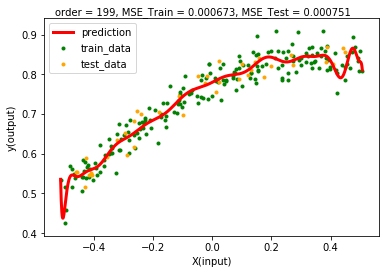

In [33]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

Y = y.reshape(-1,1)
Tx = np.linspace(x.min(), x.max(), num=1000)

o1 = np.arange(1, 8)
o2 = np.arange(10, 30, 4)
o3 = np.arange(30, 110, 20)
o4 = np.array([120, 150, 199])
orders = np.concatenate([o1,o2,o3,o4])

train_errs = []
test_errs = []

writer = ImageMagickWriter(fps=1)
with writer.saving(fig, "train_test_errors.gif", 100):
    for order in orders:
        X = get_input_for_polynomial(x, order=order)
        W = np.linalg.pinv(X) @ Y
        y_hat = X @ W

        Err = ((y_hat - Y)**2).mean()
        train_errs.append(Err)

        Xt = get_input_for_polynomial(x_test, order=order)
        y_hatt = Xt @ W
        Errt = ((y_hatt - y_test.reshape(-1,1))**2).mean()
        test_errs.append(Errt)
        
        TX = get_input_for_polynomial(Tx, order=order)
        Ty_hat = TX @ W

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='train_data')
        plt.scatter(x_test, y_test, marker='.', color='orange', label='test_data')
        plt.plot(Tx, Ty_hat, lw=3, color='r', label='prediction')
        plt.text(-0.53,0.95,f'order = {order}, MSE_Train = {Err:6f}, MSE_Test = {Errt:6f}')

        plt.xlabel("X(input)")
        plt.ylabel("y(output)")
        plt.legend()    
        
        fig.canvas.draw()
        plt.pause(0.7)
        writer.grab_frame()            

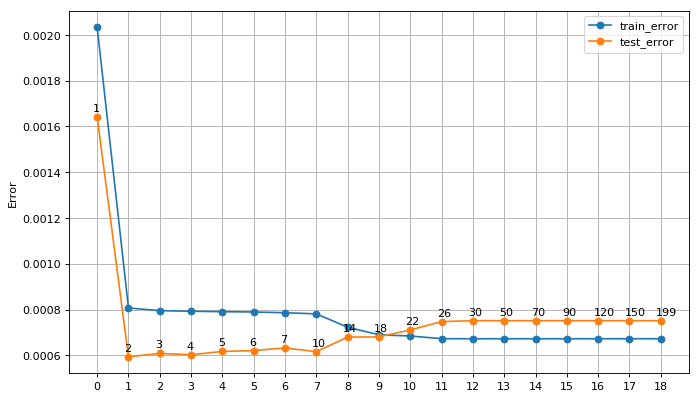

In [52]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.plot(train_errs, label='train_error', marker='o')
plt.plot(test_errs, label='test_error', marker='o')
plt.legend()
for i in range(len(orders)):
    plt.annotate(f'{orders[i]}', (i-0.15, test_errs[i]+0.000025))
ax.set_xticks(np.arange(len(orders)))
plt.grid()
plt.ylabel("Error")
plt.savefig('best_degree_fit.svg')

In [54]:
X = get_input_for_polynomial(x, order=2)
W = np.linalg.pinv(X) @ Y
W

array([[ 0.77844202],
       [ 0.33814713],
       [-0.46011941]])

In [55]:
import pandas as pd

In [56]:
table = np.c_[orders, np.array(train_errs), np.array(test_errs)]
df = pd.DataFrame(data=table, columns=['order_poly','train_error', 'test_error' ])
df.order_poly = df.order_poly.astype(int)
pd.options.display.float_format = '{:,.15f}'.format
df

,order_poly,train_error,test_error
0,1,0.002033259000068,0.001642156233707
1,2,0.000807006586623,0.000593919890021
2,3,0.000795324763721,0.000608359925575
3,4,0.000792686951924,0.000602793760356
4,5,0.000790823190330,0.000617083083767
5,6,0.000789444789347,0.000620974474399
6,7,0.000786255827090,0.000632399850820
7,10,0.000781332533796,0.000616143470111
8,14,0.000722849424580,0.000679828905533
9,18,0.000689916661399,0.000680753118786


### With gradient descent

In [81]:
np.random.seed(127)
E = 1e10
Eprev = None
a2 = np.random.normal(loc=0)
a1 = np.random.normal(loc=0)
a0 = np.random.uniform()
a0,a1,a2

(0.18596531220043622, 0.02962395978488391, -0.5718094826593835)

In [82]:
n = len(x)
alpha = 0.1
epsilon = 1e-9

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
# fig.set_animated(True)

val_list = []
writer = ImageMagickWriter(fps=10)

with writer.saving(fig, "poly_regression_gd_anim.gif", 100):
    for step in range(10000000):
        #### Set Previous error
        Eprev = E    
        #### calculating output
        y_hat = a0 + a1*x + a2*x**2
        #### calculating error
        E = ((y-y_hat)**2).mean()

        #### calculating gradients
        dy = y_hat - y
        da0 = dy.sum()/n
        da1 = (dy*x).sum()/n
        da2 = (dy*x*x).sum()/n


        a0 = a0 - alpha*da0
        a1 = a1 - alpha*da1
        a2 = a2 - alpha*da2

        val_list.append((E,a0, a1, a2))

        if step%20 == 0:
            print("step = ",step)
            print("Error = ", E)

            ax.clear()
            plt.xlabel("X(input)")
            plt.ylabel("y(output)")
            plt.scatter(x, y, marker='.', color='g', label='data')
            plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
            plt.text(-0.53,0.97,f'Step={step}, E={E:.6f} --> a0={a0:.5f} a1={a1:.5f} a2={a2:.5f}')
            plt.legend()

            plt.xlim((-0.5679516194791047, 0.5638597776169901))
            plt.ylim((0.39317623114955275, 0.9407836786747326))
            fig.canvas.draw()
            plt.pause(0.01)
            writer.grab_frame()
            print()
            if Eprev-E < epsilon:
                print(plt.xlim())
                print(plt.ylim())

                print('Optimized to our threshold')
                plt.pause(2)
                break

step =  0
Error =  0.37136244491538806

step =  20
Error =  0.011770432698312999

step =  40
Error =  0.0049913709860665255

step =  60
Error =  0.0037337744840764313

step =  80
Error =  0.002891030326414295

step =  100
Error =  0.002292848311029054

step =  120
Error =  0.0018677184961655257

step =  140
Error =  0.0015655392473302803

step =  160
Error =  0.0013507220890645205

step =  180
Error =  0.001197980545604122

step =  200
Error =  0.0010893478454632067

step =  220
Error =  0.001012058061766582

step =  240
Error =  0.0009570406078610503

step =  260
Error =  0.0009178505362445262

step =  280
Error =  0.0008899084873622718

step =  300
Error =  0.0008699606529027487

step =  320
Error =  0.0008556950652712974

step =  340
Error =  0.0008454689609882543

step =  360
Error =  0.0008381150650770908

step =  380
Error =  0.0008328039509240185

step =  400
Error =  0.0008289462432580827

step =  420
Error =  0.000826123130732877

step =  440
Error =  0.0008240369932367314

st

In [83]:
a0, a1, a2

(0.7794814744851586, 0.33816317383747035, -0.4722675670800199)

## Using the matrix

In [95]:
np.random.seed(127)
E = 1e10
Eprev = None
a2 = np.random.normal(loc=0)
a1 = np.random.normal(loc=0)
a0 = np.random.uniform()
a0,a1,a2
A = np.array([
    [a0,],
    [a1,],
    [a2,],
])
A

array([[ 0.18596531],
       [ 0.02962396],
       [-0.57180948]])

In [96]:
n = len(x)
alpha = 0.1
epsilon = 1e-9
X = get_input_for_polynomial(x, order=2)
Y = y.reshape(-1,1)
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

val_list = []
writer = ImageMagickWriter(fps=10)

with writer.saving(fig, "poly_regression_gd_anim.gif", 100):
    for step in range(10000000):
        #### Set Previous error
        Eprev = E    
        #### calculating output
        y_hat = X@A
        #### calculating error
        E = ((Y-y_hat)**2).mean()

        #### calculating gradients
        dy = y_hat - Y
        dA = X.T@dy/n

        A = A - alpha*dA

        val_list.append((E,A))

        if step%20 == 0:
            print("step = ",step)
            print("Error = ", E)

            ax.clear()
            plt.xlabel("X(input)")
            plt.ylabel("y(output)")
            plt.scatter(x, y, marker='.', color='g', label='data')
            plt.scatter(x, y_hat.reshape(-1), marker='.', color='r', label='prediction')
            a0, a1, a2 = A[0,0],A[1,0],A[2,0]
            plt.text(-0.53,0.97,f'Step={step}, E={E:.6f} --> a0={a0:.5f} a1={a1:.5f} a2={a2:.5f}')
            plt.legend()

            plt.xlim((-0.5679516194791047, 0.5638597776169901))
            plt.ylim((0.39317623114955275, 0.9407836786747326))
            fig.canvas.draw()
            plt.pause(0.01)
            writer.grab_frame()
            print()
            if Eprev-E < epsilon:
                print(plt.xlim())
                print(plt.ylim())

                print('Optimized to our threshold')
                plt.pause(2)
                break

step =  0
Error =  0.37136244491538806

step =  20
Error =  0.011770432698312999

step =  40
Error =  0.004991370986066524

step =  60
Error =  0.003733774484076432

step =  80
Error =  0.0028910303264142955

step =  100
Error =  0.002292848311029055

step =  120
Error =  0.0018677184961655264

step =  140
Error =  0.0015655392473302803

step =  160
Error =  0.0013507220890645205

step =  180
Error =  0.001197980545604122

step =  200
Error =  0.0010893478454632067

step =  220
Error =  0.001012058061766582

step =  240
Error =  0.0009570406078610503

step =  260
Error =  0.0009178505362445262

step =  280
Error =  0.0008899084873622718

step =  300
Error =  0.0008699606529027487

step =  320
Error =  0.0008556950652712974

step =  340
Error =  0.0008454689609882543

step =  360
Error =  0.0008381150650770908

step =  380
Error =  0.0008328039509240185

step =  400
Error =  0.0008289462432580827

step =  420
Error =  0.000826123130732877

step =  440
Error =  0.0008240369932367314

ste

In [97]:
A

array([[ 0.77948147],
       [ 0.33816317],
       [-0.47226757]])

In [103]:
X = get_input_for_polynomial(x, order=2)
Y = y.reshape(-1,1) 
W = np.linalg.pinv(X) @ Y
W

array([[ 0.77844202],
       [ 0.33814713],
       [-0.46011941]])

In [108]:
y_hat = X @ W
Err = ((y_hat - Y)**2).mean()
E, Err

(0.0008078623966646931, 0.000807006586622848)

### Error Plot

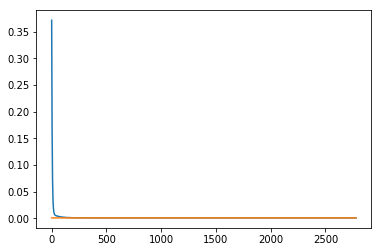

In [107]:
%matplotlib inline
errors = np.array(val_list)[:,0]
plt.plot(errors)
plt.plot([Err]*len(errors))